In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
sns.set()

import math

In [0]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = val_position * (n_colors - 1) # target index in the color palette
            if math.isnan(ind) : 
              ind = 0
            return palette[int(ind)]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 


def corrplot(data, size_scale=500, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=256),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale
    )



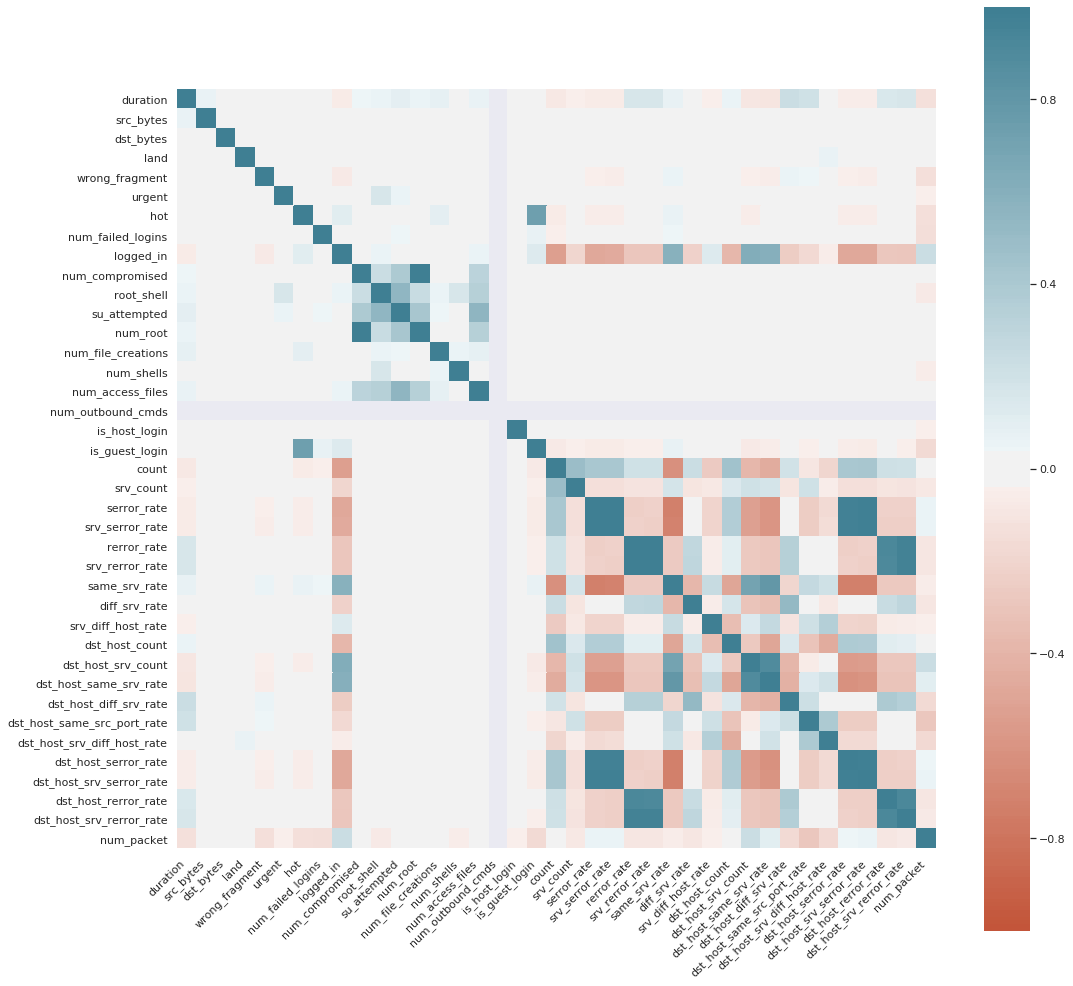

In [0]:
%matplotlib inline
data = pd.read_csv('https://raw.githubusercontent.com/hasobi/skripsi/master/dataset/gabungan_train_test-original.csv')#('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')

# plt.figure(figsize=(20,20))


corr = data.corr()
plt.figure(figsize=(17, 17))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [0]:
data.shape

(173708, 43)

In [0]:
# dicitionary untuk merubah tipe serangan menjadi lebih umum seperti Normal, DoS, Probe, U2R, dan R2L

attack_dict={ #DOS
    'back' : 'dos',
    'land' : 'dos',
    'neptune' : 'dos',
    'pod' : 'dos',
    'smurf' : 'dos',
    'teardrop' : 'dos',
    'apache2' : 'dos',
    'udpstorm' : 'dos',
    'processtable' : 'dos',
    'worm' : 'dos',
    'mailbomb' : 'dos',
    
    #probe
    'satan' : 'probe',
    'ipsweep' : 'probe',
    'nmap' : 'probe',
    'portsweep' : 'probe',
    'mscan' : 'probe',
    'saint' : 'probe',
    
    #R2L
    'guess_passwd' : 'r2l',
    'ftp_write' : 'r2l',
    'imap' : 'r2l',
    'phf' : 'r2l',
    'multihop' : 'r2l',
    'warezmaster' : 'r2l',
    'warezclient' : 'r2l',
    'spy' : 'r2l',
    'xlock' : 'r2l',
    'xsnoop': 'r2l',
    'snmpguess' : 'r2l',
    'snmpgetattack' : 'r2l',
    'httptunnel' : 'r2l',
    'sendmail' : 'r2l',
    'named' : 'r2l',
    
    #U2R
    'buffer_overflow' : 'u2r',
    'loadmodule' : 'u2r',
    'rootkit' : 'u2r',
    'perl' : 'u2r',
    'sqlattack' : 'u2r',
    'xterm' : 'u2r',
    'ps' : 'u2r'
}

data.replace(attack_dict, inplace = True)

In [0]:
protocol_dict ={
    "udp" : 0,
    "tcp" : 1,
    "icmp": 2
}

service_dict={
    "Z39_50" : 0,
    "X11" : 1,
    "whois" : 2,
    "vmnet" : 3,
    "uucp_path" : 4,
    "uucp" : 5,
    "urp_i" : 6,
    "urh_i" : 7,
    "time" : 8,
    "tim_i" : 9,
    "tftp_u" : 10,
    "telnet" : 11,
    "systat" : 12,
    "supdup" : 13,
    "sunrpc" : 14,
    "ssh" : 15,
    "sql_net" : 16,
    "smtp" : 17,
    "shell" : 18,
    "rje" : 19,
    "remote_job" : 20,
    "red_i" : 21,
    "private" : 22,
    "printer" : 23,
    "pop_3" : 24,
    "pop_2" : 25,
    "pm_dump" : 26,
    "other" : 27,
    "ntp_u" : 28,
    "nntp" : 29,
    "nnsp" : 30,
    "netstat" : 31,
    "netbios_ssn" : 32,
    "netbios_ns" : 33,
    "netbios_dgm" : 34,
    "name" : 35,
    "mtp" : 36,
    "login" : 37,
    "link" : 38,
    "ldap" : 39,
    "kshell" : 40,
    "klogin" : 41,
    "iso_tsap" : 42,
    "IRC" : 43,
    "imap4" : 44,
    "http_8001" : 45,
    "http_443" : 46,
    "http_2784" : 47,
    "http" : 48,
    "hostnames" : 49,
    "harvest" : 50,
    "gopher" : 51,
    "ftp_data" : 52,
    "ftp" : 53,
    "finger" :  54,
    "exec" : 55,
    "efs" : 56,
    "ecr_i" : 57,
    "eco_i" : 58,
    "echo" : 59,
    "domain_u" : 60,
    "domain" : 61,
    "discard" : 62,
    "daytime" : 63,
    "ctf" : 64,
    "csnet_ns" : 65,
    "courier" : 66,
    "bgp" : 67,
    "auth" : 68,
    "aol" : 69

}

flag_dict={
    "SH" : 0,
    "SF" : 1,
    "S3" : 2,
    "S2" : 3,
    "S1" : 4,
    "S0" : 5,
    "RSTR" : 6,
    "RSTOS0" : 7,
    "RSTO" : 8,
    "REJ" : 9,
    "OTH" : 10

}

data.replace(flag_dict, inplace = True)
data.replace(service_dict, inplace = True)
data.replace(protocol_dict, inplace = True)


In [0]:
data = data.loc[data['type_attack'].isin(['normal','dos'])]

In [0]:
atck_dict={
    "normal" : 0,
    "dos" : 1
}

data.replace(atck_dict, inplace = True)

In [0]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,1,52,1,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,0
1,0,0,27,1,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,0
2,0,1,22,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,1
3,0,1,48,1,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,0
4,0,1,48,1,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0


In [0]:
data = data.loc[:,:].astype(int)

In [0]:
data.isnull().values.any()

False

In [0]:
data.fillna(0)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,1,52,1,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,1,0,0,150,25,0,0,0,0,0,0,0,0,20,0
1,0,0,27,1,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0,0,0,0,0,0,0,255,1,0,0,0,0,0,0,0,0,15,0
2,0,1,22,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1,1,0,0,0,0,0,255,26,0,0,0,0,1,1,0,0,19,1
3,0,1,48,1,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0,0,0,0,1,0,0,30,255,1,0,0,0,0,0,0,0,21,0
4,0,1,48,1,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0,0,0,0,1,0,0,255,255,1,0,0,0,0,0,0,0,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173702,0,2,57,1,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,53,0,0,0,0,1,0,0,255,255,1,0,1,0,0,0,0,0,20,1
173703,0,1,17,1,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,100,141,0,0,0,0,0,0,0,0,21,0
173704,0,1,48,1,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0,0,0,0,1,0,0,197,255,1,0,0,0,0,0,0,0,21,0
173705,0,1,48,1,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0,0,0,0,1,0,0,255,255,1,0,0,0,0,0,0,0,15,1


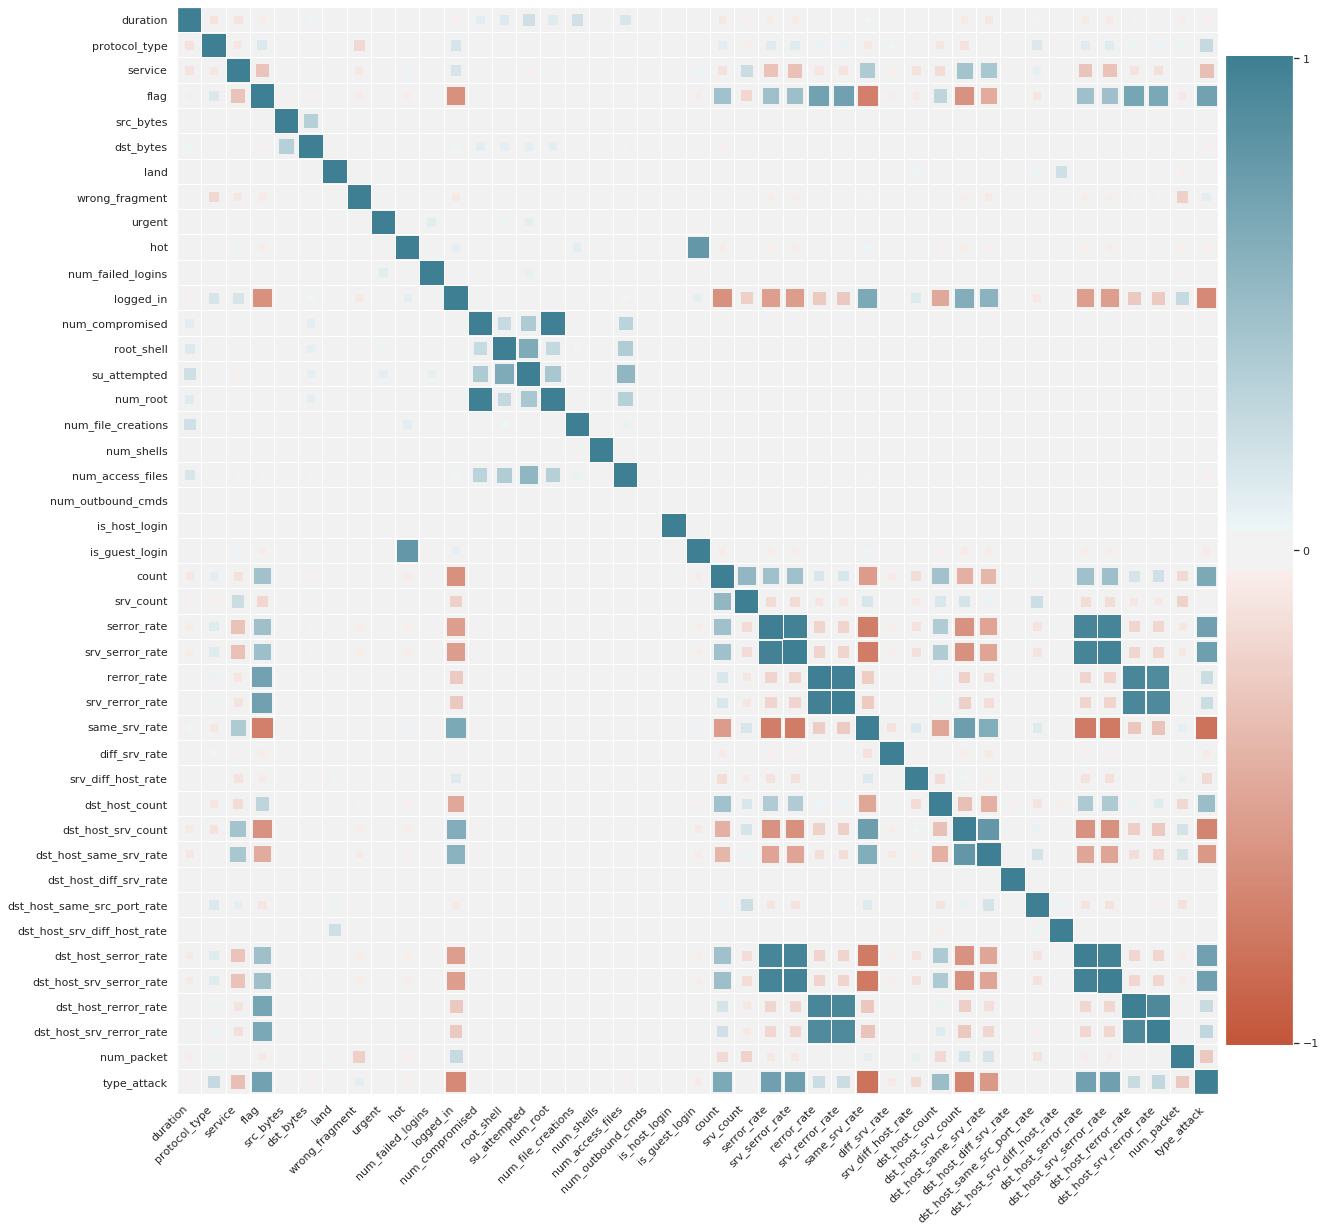

In [0]:
plt.figure(figsize=(20, 20))
corrplot(data.corr())